In [7]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
def quota(inv_y, inv_yhat,name):
    rmse_ = sqrt(mean_squared_error(inv_y, inv_yhat))
    mae_=mean_absolute_error(inv_y, inv_yhat)
    r2_ = r2_score(inv_y, inv_yhat)
    print(name,'的rmse:', rmse_, ' mae:', mae_, ' R2:', r2_)

In [9]:
data0=loadmat('结果/vmd-lstm_result.mat')['true'].T
data1=loadmat('结果/elm_result.mat')['pred']
data2=loadmat('结果/svr_result.mat')['pred']
data3=loadmat('结果/bp_result.mat')['pred']
data4=loadmat('结果/lstm_result.mat')['pred']
data5=loadmat('结果/vmd-lstm_result.mat')['pred'].T

In [10]:
print(data0.shape,data1.shape,data2.shape,data3.shape,data4.shape,data5.shape)

(1000, 1) (1000, 1) (1000, 1) (1000, 1) (1000, 1) (1000, 1)


In [11]:
quota(data0,data1,'ELM')
quota(data0,data2,'SVR')
quota(data0,data3,'BP')
quota(data0,data4,'LSTM')
quota(data0,data5,'VMD-LSTM')

ELM 的rmse: 15.223982718578343  mae: 12.159615698450628  R2: 0.035788590593619274
SVR 的rmse: 15.203337103132732  mae: 12.057916945567538  R2: 0.0384019987046772
BP 的rmse: 15.246572269621563  mae: 12.144988584689791  R2: 0.03292504787955142
LSTM 的rmse: 15.188720296716458  mae: 12.099525000112946  R2: 0.04025011074980678
VMD-LSTM 的rmse: 1.6682794315114315  mae: 1.3463321489974331  R2: 0.9884214735461054


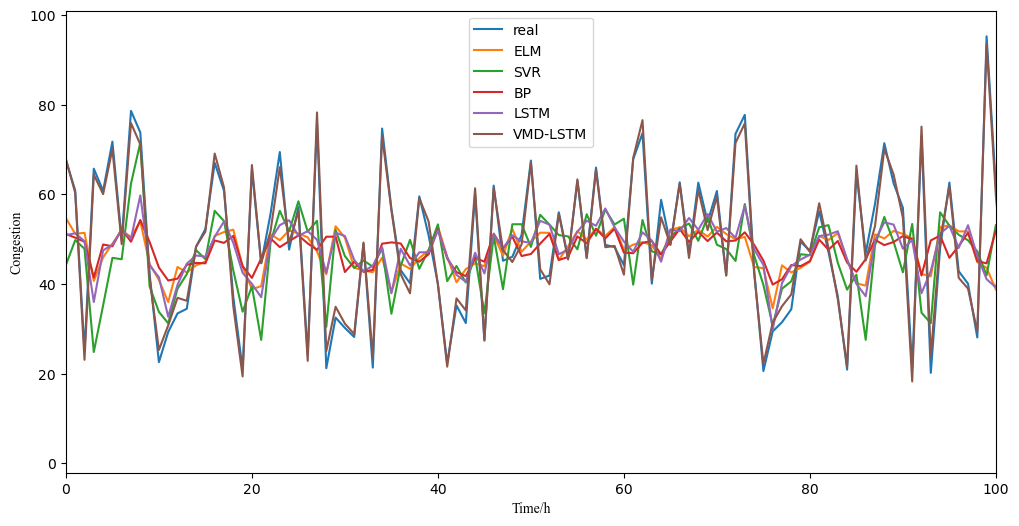

In [12]:
# In[7] 画图
plt.figure(figsize=(12,6))
plt.plot(data0,'-',label='real')
plt.plot(data1,'-',label='ELM')
plt.plot(data2,'-',label='SVR')
plt.plot(data3,'-',label='BP')
plt.plot(data4,'-',label='LSTM')
plt.plot(data5,'-',label='VMD-LSTM')
plt.xlim((0,100))
# plt.grid()
plt.legend()
plt.xlabel('Time/h',fontdict={"family":"Times New Roman"})
plt.ylabel('Congestion',fontdict={"family":"Times New Roman"})
plt.savefig('figure/各预测方法对比结果图.png')
plt.show()